In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("./train.csv", usecols=['Survived', 'Age', 'Fare'])

In [4]:
df.fillna(df['Age'].mean(), inplace=True)

In [5]:
def functionTransformer(eqn):
    x = df.iloc[:,1:3]
    y = df.iloc[:,0]
    colTransformer = ColumnTransformer(
        [
            ('t1', FunctionTransformer(eqn), ['Fare'])
        ],
        remainder='passthrough'
    )

    xNew = colTransformer.fit_transform(x)

    clf = LogisticRegression()

    plt.figure(figsize=(14,2))

    plt.subplot(121)
    stats.probplot(x['Fare'], plot=plt)
    plt.title("Before Transformation")

    plt.subplot(122)
    stats.probplot(xNew['Fare'], plot=plt)
    plt.title("After Transformation")

    plt.show()

    print("Accuracy of Logistic Regression model: ", np.mean(cross_val_score(clf, xNew, y, scoring='accuracy', cv=10)))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

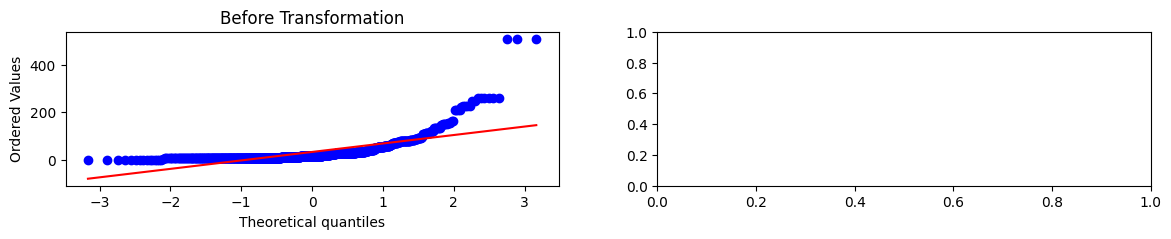

In [6]:
functionTransformer(lambda x: x)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

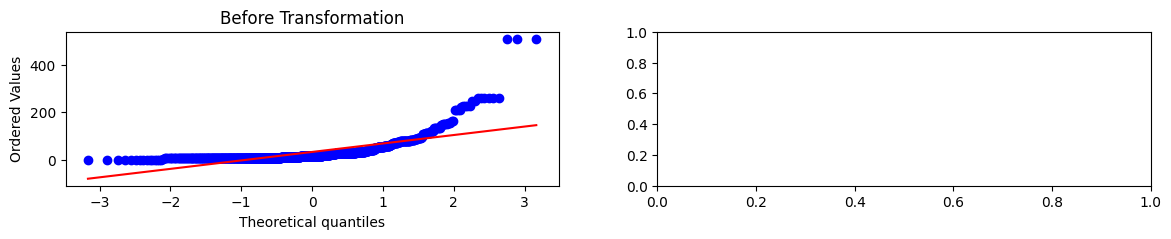

In [7]:
functionTransformer(lambda x: x**2)

KeyError: 'Fare'

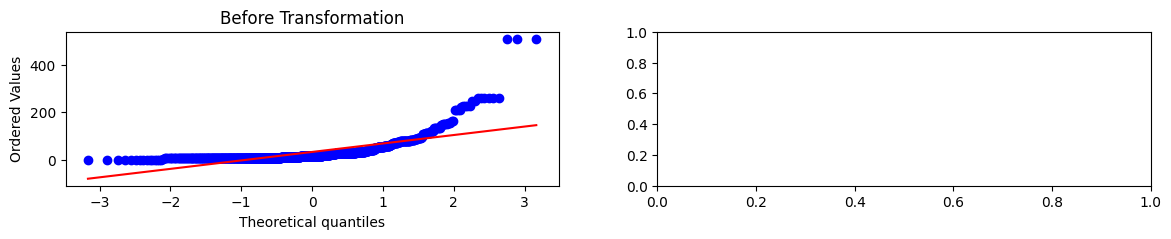

In [ ]:
functionTransformer(lambda x: np.log1p(x))

KeyError: 'Fare'

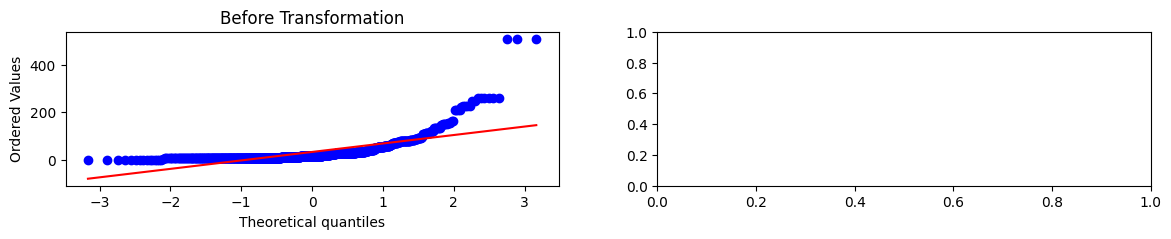

In [ ]:
functionTransformer(lambda x: x**(1/2))